In [58]:

pip install pycaret

Note: you may need to restart the kernel to use updated packages.


# Look at the last cell=main

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression  # Replace with your regression model of choice

from sklearn.preprocessing import LabelBinarizer

from sklearn .model_selection import train_test_split
         
import seaborn as sns

/kaggle/input/diamonds/diamonds.csv


In [60]:
class get_cleaned_data:
        
    def load_data (self,path):
        extention =path.split('.')[-1]
        if extention == 'csv':
           data = pd. read_csv(path)
        elif extention == 'json' :
           data = json.load(path)
        elif extention == 'txt' :
           with open(path, 'r') as file:
                data = file.read()
        elif extention == 'db':
            conn = sqlite3.connect(path)
            query = "SELECT * FROM ;"
            data = pd.read_sql(query, conn)
            conn.close()
        else:
            raise ValueError("Unsupported file extension")
        return data
    
    def check(self,data):
        print(data.isnull().sum())
        if data.isnull().sum() .sum() == 0:
            print ('\nNO Null Value')
        else :
            print('\nWarning :Null value ,deal with it')
            for c in data.columns :
                print(c)
                if data[c].dtype !='object' :
                    print(c)
                    if data[c].isna().sum()> data.shape[0]/4:
                        #print(c,'n')
                        data[c].dropna()
                    elif data[c].isna().sum()==0:
                        continue
                    else :
                        #print(c,'else')
                        data[c].fillna(data[c].mean(),inplace=True)
                else :
                    if data[c] .isna().sum()>0:
                        mode_category = data[c].mode()[0] 
                        data[c].fillna(value=mode_category, inplace=True)

            print(data.isnull().sum())
        if data.index.is_unique:
            print('\nSample is unique no duplicated')

        else :
            print('\ndupplicated , deal with it ...')
            data_unique = data.drop_duplicates(keep='first')
        
        return data


In [61]:
def preprocess_data(data):
    # Detect column types
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    numeric_columns = data.select_dtypes(exclude=['object']).columns.tolist()

    # Iterate through categorical columns
    choice = input(f"What do you want to do with missing values through categorical columns' (1:most_frequent/ 2:additional_class)? ")
        
    for col in categorical_columns:
        #choice = input(f"What do you want to do with missing values in '{col}' (1_most_frequent/ 2_additional_class)? ")
        if choice == "most_frequent":
            data[col].fillna(data[col].mode()[0], inplace=True)
        elif choice == "additional_class":
            data[col].fillna("missing", inplace=True)
        # Add more handling options as needed

        # Iterate through numeric columns
    choice = input(f"What do you want to do with missing values through numeric columns (1:mean/2:median/3:mode)? ")
        
    for col in numeric_columns:
        #choice = input(f"What do you want to do with missing values in '{col}' (mean/median/mode/leave_blank)? ")
        if choice == "1":
            data[col].fillna(data[col].mean(), inplace=True)
        elif choice == '2':
            data[col].fillna(data[col].median(), inplace=True)
        elif choice == "3":
            data[col].fillna(data[col].mode()[0], inplace=True)
        # Add more handling options as needed

    return data

# Load your dataset
#data= pd.read_csv(path)
# Call the preprocessing function
preprocessed_data = preprocess_data(data)

# Continue with the rest of your data preprocessing and modeling steps


What do you want to do with missing values through categorical columns' (1:most_frequent/ 2:additional_class)?  1
What do you want to do with missing values through numeric columns (1:mean/2:median/3:mode)?  2


In [62]:
import seaborn as sns

def cat(data):
    cat_feature=[i for  i in data.columns  if data[i].dtype =='object']
    return cat_feature
cat_feature = cat(data)
cat_feature
def num(data):
    num_feature=[i for  i in data.columns  if data[i].dtype !='object']
    return num_feature
num_feature=num(data)
num_feature


['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [63]:
def EDA (df):
    def corr(data):
        numeric_columns = data.select_dtypes(exclude=['object']).columns
        corr_matrix= data[numeric_columns].corr()

    
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap')
        plt.show()

    def box(data,cat_feature,target):
        if target.dtype  !='object':
            fig, axes = plt.subplots(len(cat_feature)//3+1, 3, figsize=(10, 20))

            for i, f in enumerate(cat_feature):
                row = i // 3  # Row index of the subplot
                col = i % 3  # Column index of the subplot
                sns.boxplot(x=f,y=target,data=data, ax=axes[row, col])
            for i in range(len(cat_feature), len(axes.ravel())):
                fig.delaxes(axes.ravel()[i])

            plt.tight_layout()  # Adjust subplot spacing
            plt.show()

    #box(data,cat_feature,data.iloc[:,-1])


    def scatter(df,num_feature):
        #_,ax = plt.subplots(3,3,figsize=(12,4))
        #fig, axes = plt.subplots(len(cat_feature)//3+1, 3, figsize=(10, 20))

        #for i, f in enumerate(num_feature):
            #row = i // 3  # Row index of the subplot
            #col = i % 3  # Column index of the subplot

        #df.plot.scatter(x=num_feature[i-1],y=num_feature[i])    
        #data.scatter(x=
        sns.pairplot(data)
        plt.tight_layout()
        plt.show()
    
    corr(df)
    print('box plot:')
    box(df,cat_feature,data.iloc[:,-1])
    print('scatter plot')
    scatter(df,num_feature)
    
    

In [64]:
def EDA (df):
    def corr(data):
        numeric_columns = data.select_dtypes(exclude=['object']).columns
        corr_matrix= data[numeric_columns].corr()

    
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap')
        plt.show()

    def box(data,cat_feature,target):
      if target.dtype  !='object':
        fig, axes = plt.subplots(len(cat_feature)//3+1, 3, figsize=(10, 20))

        for i, f in enumerate(cat_feature):
            row = i // 3  # Row index of the subplot
            col = i % 3  # Column index of the subplot
            sns.boxplot(x=f,y=target,data=data, ax=axes[row, col])
        for i in range(len(cat_feature), len(axes.ravel())):
            fig.delaxes(axes.ravel()[i])

        plt.tight_layout()  # Adjust subplot spacing
        plt.show()

    #box(data,cat_feature,data.iloc[:,-1])


    def scatter(df,num_feature):
        #_,ax = plt.subplots(3,3,figsize=(12,4))
        #fig, axes = plt.subplots(len(cat_feature)//3+1, 3, figsize=(10, 20))

        #for i, f in enumerate(num_feature):
            #row = i // 3  # Row index of the subplot
            #col = i % 3  # Column index of the subplot

        #df.plot.scatter(x=num_feature[i-1],y=num_feature[i])    
        #data.scatter(x=
        sns.pairplot(data)
        plt.tight_layout()
        plt.show()
    
    
    corr(df)
    print('box plot:')
    box(df,cat_feature,data.iloc[:,-1])
    print('scatter plot')
    scatter(df,num_feature)
    
    

In [65]:
def set_up(df,target):
    
        def basic_inf (df,target):
            dic= {'Target':[target],'shape':[df.shape],
          'target type':[df[target].dtype],
          'N.catigorical feature':[(df.dtypes=='object').sum()],
          'N.numerical feature':[((df.dtypes == 'float64') | (df.dtypes == 'int64')).sum()],
          'Task':['classification' if df[target].dtype == 'object' else 'regression']
         }
            #df = pd.DataFrame(dic)
            global task_type
            task_type = ['classification' if df[target].dtype == 'object' else 'regression']
            df = pd.DataFrame(dic)
            return df.T
        
        def uniq (df):
            df=pd.DataFrame([[i,df[i].unique(),df[i].dtype,len(df[i].unique())]for i in df.columns],columns=['feature','val','types','len']).set_index('feature')
            return df
       
        def binarizer (df,bin_val):
            lb = LabelBinarizer()

            for col in bin_val :
                df[col]=lb .fit_transform(df[col])
            
            return df
        
        def numeric(df,num_val): 
            for col in num_val:
                #print(col)
                df [col]=pd.to_numeric(df[col],errors='coerce')
            return df
        
        def dummy(df):
            df_dummy=pd.get_dummies(df)
            return df_dummy
        
        def split(df_dummy,target):
            y,X = df_dummy[target],df_dummy.drop(columns=target)
            global x_train ,x_test,y_train,y_test
            x_train ,x_test,y_train,y_test =  train_test_split (X,y,test_size=.3,random_state=22)
            print(x_train.shape ,x_test.shape,'\n',y_train.shape,y_test.shape)
            return x_train ,x_test,y_train,y_test
        
        def normalizer (df):
            
            from sklearn.preprocessing import MinMaxScaler

            mms = MinMaxScaler()

            for col in [num_feature]:
                 df[col] = mms.fit_transform(df[col])
            return df   
                    
        basic_info = basic_inf(df,target)
        df_unique = uniq(df)
        cat_val = list(df_unique[(df_unique['len']>2) & (df_unique['types']=='object')].index)
        bin_val = list(df_unique[df_unique['len']==2].index)
        num_val= list(set(df.columns) -set(cat_val))
        
        df = binarizer(df,bin_val)
        df = numeric(df,num_val)
        
        #data = binarizer(data,cat_val)
         
        df = dummy(df)
        
        #lb = LabelBinarizer()
        #data =lb.fit_transform(data)
        df= binarizer(df,list(set(df.columns)-set(num_val)-set(bin_val)))
        df = normalizer(df)
        split(df,target)
        
        global data
        data = df
        #return data
        return basic_info 
     
        #return df_unique

In [66]:
set_up(data,target)

(37758, 27) (16182, 27) 
 (37758,) (16182,)


,0
Target,price
shape,"(53940, 11)"
target type,int64
N.catigorical feature,3
N.numerical feature,8
Task,regression


In [67]:
data#['SalePrice'].dtype=='ob'

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.000000,0.006237,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.000019,0.002079,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.000037,0.006237,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.000056,0.018711,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.000074,0.022869,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.999926,0.108108,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.999944,0.108108,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522,0,1,...,0,0,0,0,1,0,0,0,0,0
53937,0.999963,0.103950,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.999981,0.137214,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610,0,0,...,0,0,0,0,0,1,0,0,0,0


**model**

In [68]:

class RegModel:
    def __init__(self, model,model_name):
        self.model = model
        self.model_name = model_name
    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
        mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
        r2 = r2_score(y_test, y_pred)  # R-squared (Coefficient of Determination)
        result={'Model':self.model_name,
                'MSE':mse,
                'MAE':mae,
                'r2' :r2
                }
        return result



In [69]:
def plot_model(df_results):
    for i in range(len(df_results.T)):
        #print(df_results.columns[0])
        plt.plot(df_results[df_results.columns[i]],marker='o')
        plt.legend([c for c in df_results.columns],title='Metrics')
    
        plt.show

In [70]:

class clasModel:
    def __init__(self, model,model_name='m'):
        self.model = model
        self.model_name = model_name

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)
    
    def prob(self ,X_test):
        y_prob = self.model.predict_proba(X_test)[:, 1]

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        #y_prob = self.prob(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        #auc = roc_auc_score(y_test, y_prob)
        #metrics = [accuracy,precision,recall,f1,auc]
        result = {
        'Model': self.model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        #'AUC': auc
         }
        return result

In [71]:
def compare_model():
    if task_type[0] =='classification':
        global clasmodels
        clasmodels = {'KNN':KNeighborsClassifier(),
                 'Logistic Regression': LogisticRegression(),
                 'Random Forest': RandomForestClassifier(),
                 'Decision Tree': DecisionTreeClassifier(),
                 #'SVM': SVC()
                  }

        results= []
        for  nm,model in zip(clasmodels,clasmodels.values()):
            modeli = clasModel(model,nm)
            modeli.train(x_train,y_train)
            result = modeli.evaluate(x_test,y_test)
            results.append(result)
            print (nm)
        #df_results = pd.DataFrame(results)
    
    elif task_type[0] =='regression':
        global regmodels
        regmodels = {'KNNReg':KNeighborsRegressor(n_neighbors=5),
                 'Linear Regression': LinearRegression(),
                 'Ridge': Ridge(alpha=1.0),
                 
                  }

        results= []
        for  nm,model in zip(regmodels.keys(),regmodels.values()):
            modeli = RegModel(model,nm)
            modeli.train(x_train,y_train)
            result = modeli.evaluate(x_test,y_test)
            results.append(result)
            print (nm)
    
    df_results = pd.DataFrame(results)
    
    df_results=df_results.set_index('Model')
    
    #df_results=df_results.sort_values(by=df_results.iloc[:,0],ascending=False)
    
    df_results=df_results.sort_values(by=df_results.columns[0]
                                      ,ascending=False)
    
    global best_model
    best_model=df_results[df_results[df_results.columns[0]]==df_results[df_results.columns[0]][0]].index
    best_model=best_model[0]
    print('best model based on Accureacy score:',best_model)
    
    for i in range(len(df_results.T)):
        #print(df_results.columns[0])
        plt.plot(df_results[df_results.columns[i]],marker='o')
        plt.legend([c for c in df_results.columns],title='Metrics')
    
        plt.show
    return df_results

In [72]:
def evaluate(best_model):
    #intial the model
    if task_type[0] =='classification':
        if best_model in clasmodels.keys():
            model = clasmodels[best_model]
            print(model)
    elif task_type[0]!='classification':
        if best_model in regmodels.keys():
            model = regmodels[best_model]
            print(model)
            
    #evaluate best model in out test data
    
    y_pred=model.predict(x_test)
    
    

                
#clasmodels.keys()
evaluate(best_model)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, positive=False,
      random_state=None, solver='auto', tol=0.0001)


In [ ]:
from pycaret.classification import *

#data = get_cleand_data("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = pd.read_csv(path)
setup(data, target=target)

Explore pycaret libirary

In [ ]:
import seaborn as sns
from pycaret.classification import *

pls the path of dataset: /kaggle/input/diamonds/diamonds.csv
What do you want to do with missing values through categorical columns' (1:most_frequent/ 2:additional_class)?  1
What do you want to do with missing values through numeric columns (1:mean/2:median/3:mode)?  2


the data after cleaned: 
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64
the categorical data is:
['cut', 'color', 'clarity']
the numerical data is:
['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']


choose the name of the label columns: price


some visualization between col


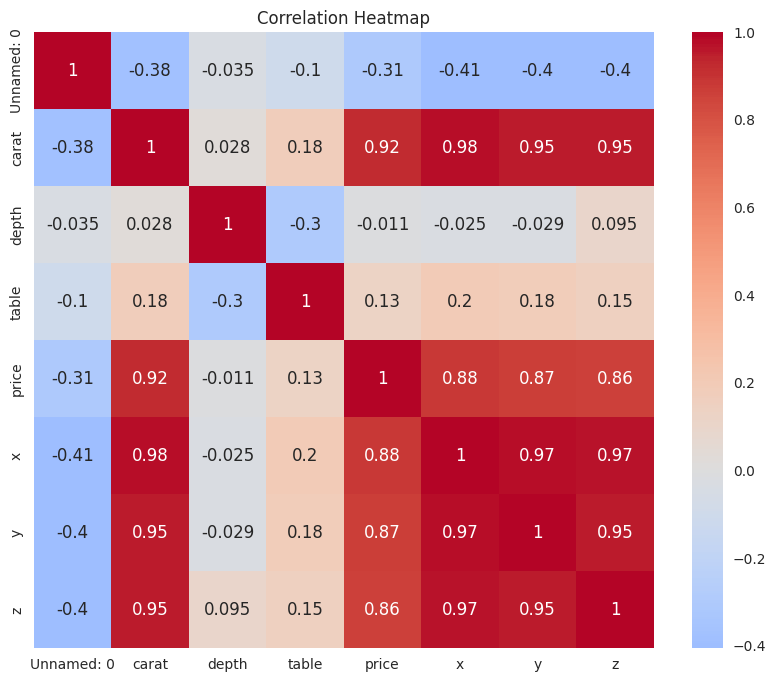

box plot:


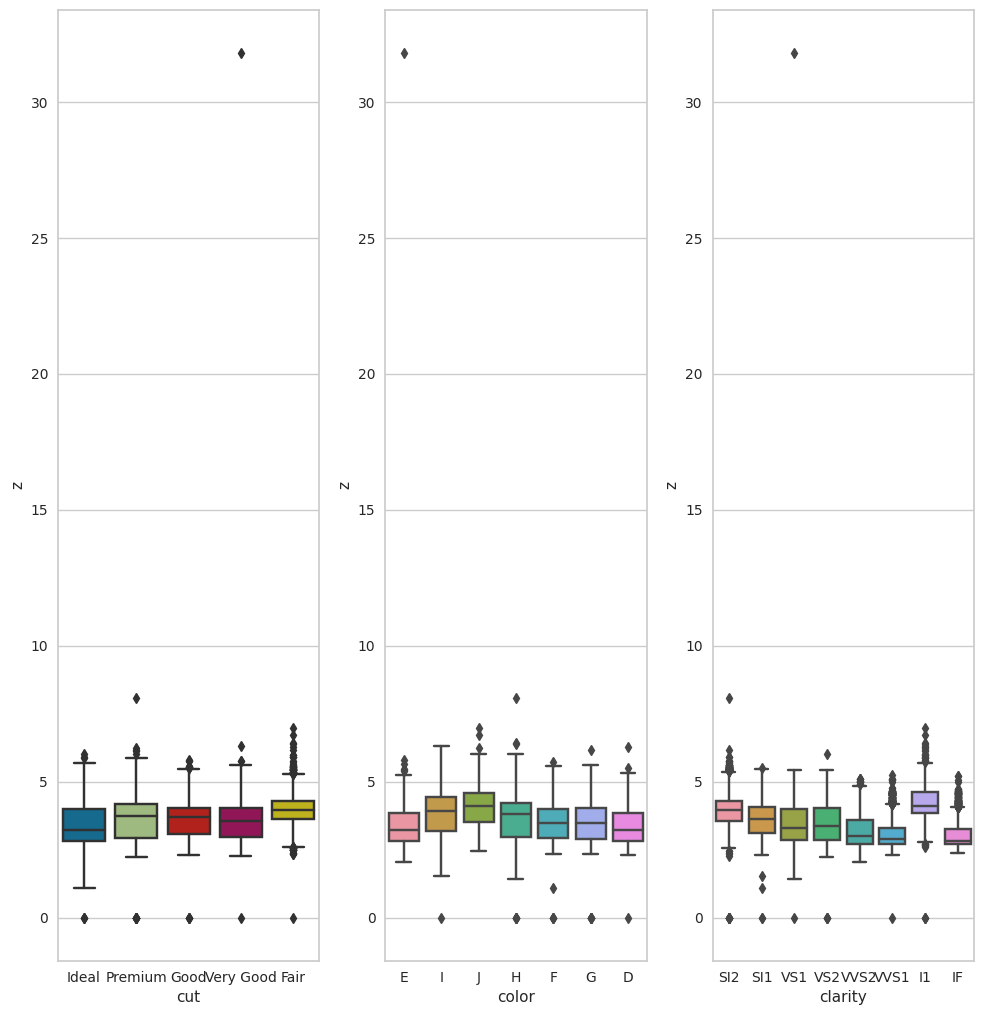

scatter plot


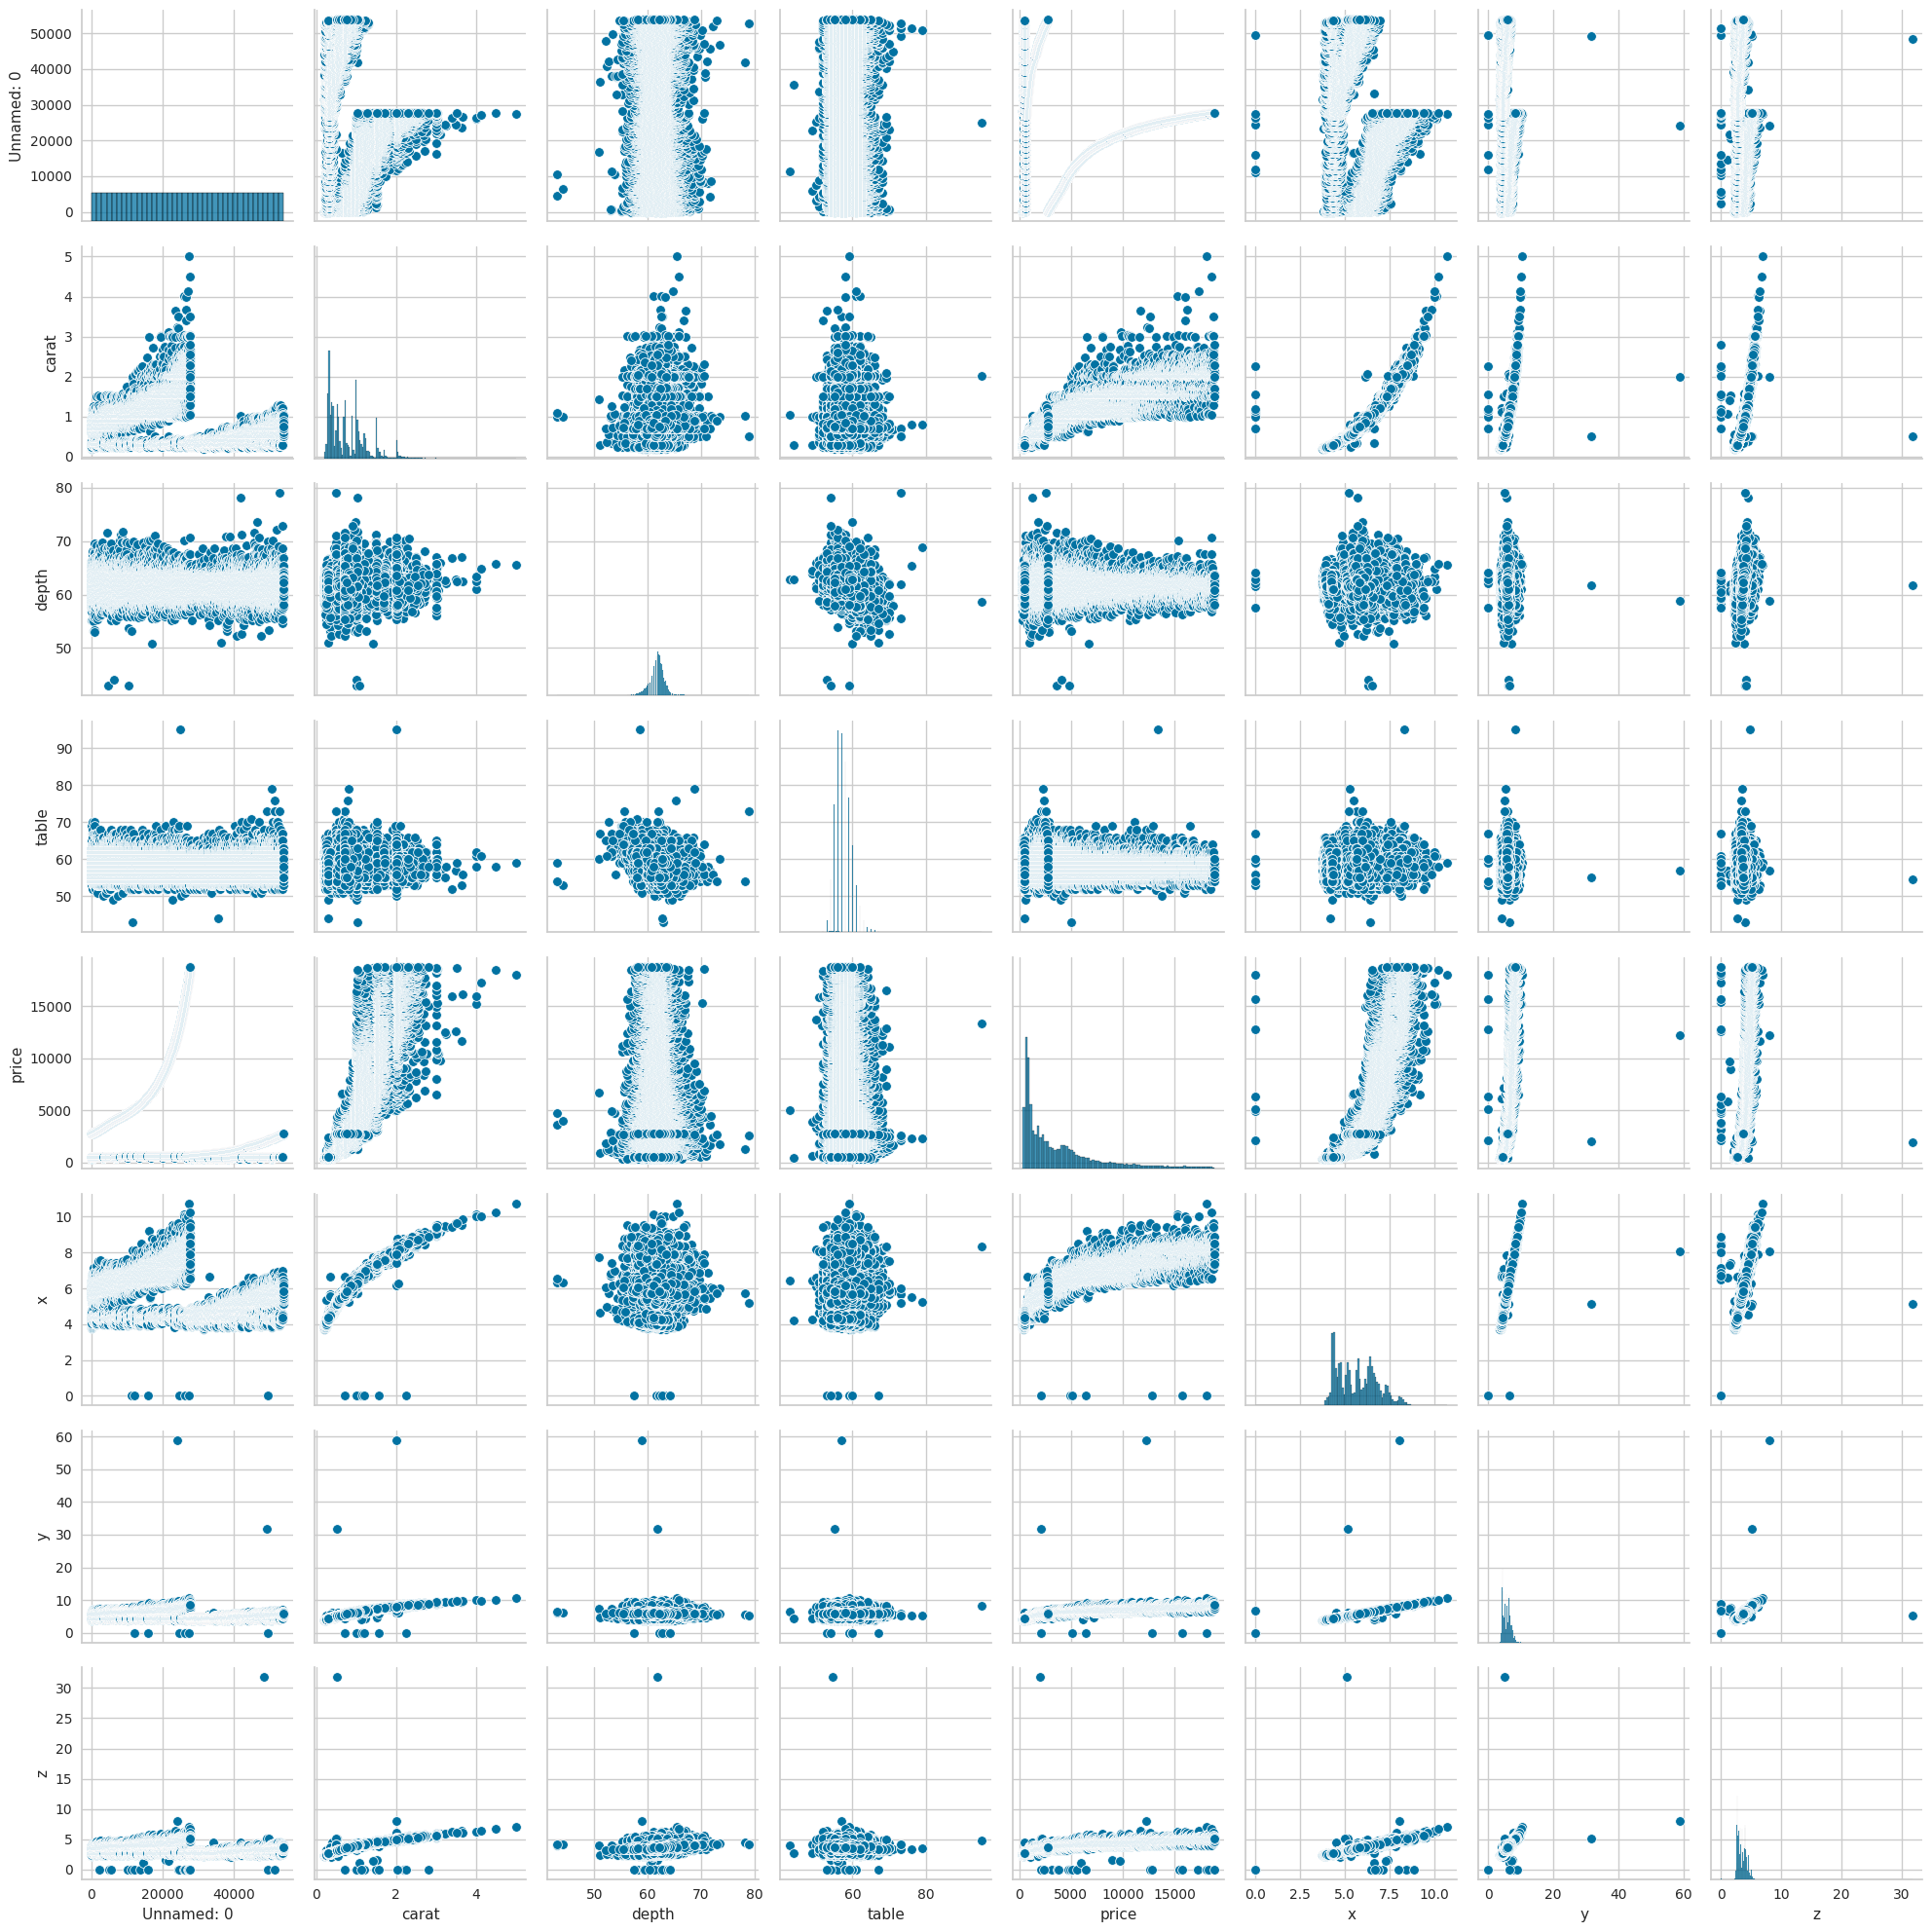

(37758, 27) (16182, 27) 
 (37758,) (16182,)
                                 0
Target                       price
shape                  (53940, 11)
target type                  int64
N.catigorical feature            3
N.numerical feature              8
Task                    regression
the comparion between models
KNNReg
Linear Regression
Ridge
best model based on Accureacy score: Ridge


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

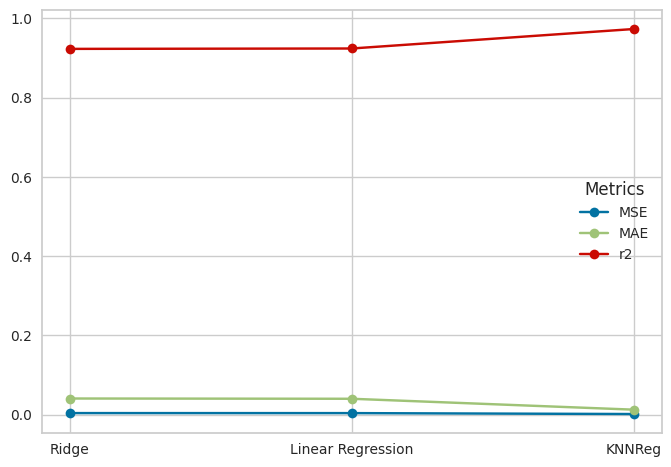

In [74]:
 if __name__ == "__main__":
    path = input('pls the path of dataset:')
    setup_obj =get_cleaned_data()

    #path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'

    data=setup_obj.load_data(path)
    #data=setup_obj.check(data)
    preprocess_data(data)
    print('the data after cleaned: ')
    print(data.isna().sum())
    print('the categorical data is:')
    print(cat(data))
    print('the numerical data is:')
    print(num(data))
    target = input('choose the name of the label columns:')
    print('some visualization between col')
    EDA(data,)
    print(set_up(data,target))
    print('the comparion between models')
    compare_model()
    best_model
    data = pd.read_csv(path)
    setup(data, target=target)
    best_model = compare_models()
    evaluate_model(best_model)
    predictions = predict_model(best_model, data=data)
    print(predictions)